In [1]:
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Assignment 4 Part 1

# Libraries

In [62]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.models import load_model, save_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from plot_keras_history import show_history, plot_history
import scikitplot as skplt
import glob
from IPython.utils import io
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import save, load
from pickleshare import PickleShareDB
%matplotlib inline

# 1A

In [3]:
trainDat = pd.read_csv('train_digital.csv')
testDat =  pd.read_csv('test_digital.csv')

In [4]:
np.random.seed(11)
X = trainDat.loc[:,trainDat.columns!='label'].to_numpy(copy = True)
y = trainDat.label.to_numpy(copy = True)
TrainX, TestX, Trainy, Testy = train_test_split(X,y,
                                      stratify=y,
                                      shuffle=True,
                                      test_size=0.10,
                                      random_state=3)

In [54]:
TrainX.shape
TestX.shape
Trainy.shape
Testy.shape

(37800, 784)

(4200, 784)

(37800, 10)

(4200, 10)

In [6]:
TrainX = TrainX/255
TestX = TestX/255

The dataset is read in and the training data is randomly split off and 10% is set aside to use in final testing of the model. They are converted to numpy arrays and standardized. 

In [7]:
Trainy = tf.keras.utils.to_categorical(Trainy, num_classes=10)
Testy = tf.keras.utils.to_categorical(Testy, num_classes=10)

The training y and testing y data are converted to binary variables for the MLP and CNN models.

In [8]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(9)

In [9]:
mlp1 = tf.keras.Sequential()
mlp1.add(tf.keras.Input(shape=(784,)))
mlp1.add(layers.Dense(32,activation='relu'))
mlp1.add(layers.Dense(32,activation='relu'))
mlp1.add(layers.Dense(32,activation='relu'))
mlp1.add(layers.Dense(32,activation='relu'))
mlp1.add(layers.Dense(10,activation='relu'))
mlp1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


2022-03-04 04:53:42.544591: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The first MLP was created here with 4 hidden layers, relu activation, and 32 units/layer. Three more MLP's will be created that consist of 4 hidden layers with relu activation, 2 hidden layers with sigmoid activation, and 4 hidden layers with sigmoid activation.

In [10]:
mlp1.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [11]:
%%time
mlp1_history=mlp1.fit(TrainX, Trainy,
        epochs=25,
        batch_size=32,
        validation_data=(TestX,Testy),
        verbose=0)

CPU times: user 55.4 s, sys: 7.15 s, total: 1min 2s
Wall time: 36.4 s


The MLP was compiled using binary cross entropy as the loss. The MLP was then trained and validated using the training data that was split earlier with 25 epochs and 32 batch size. These will stay constant in all networks.

In [12]:
pd.DataFrame(mlp1_history.history).sort_values(['val_acc'],ascending=False)

,loss,acc,val_loss,val_acc
24,0.043927,0.970238,0.066685,0.954524
20,0.046634,0.966693,0.066907,0.952857
22,0.043860,0.968280,0.065636,0.951905
21,0.045113,0.967725,0.066272,0.951905
19,0.046919,0.966323,0.065710,0.951190
23,0.043511,0.969921,0.064261,0.950714
18,0.048323,0.965503,0.069600,0.950476
16,0.050647,0.961534,0.068618,0.950000
14,0.053450,0.959021,0.070593,0.950000
17,0.049233,0.963492,0.068700,0.949286


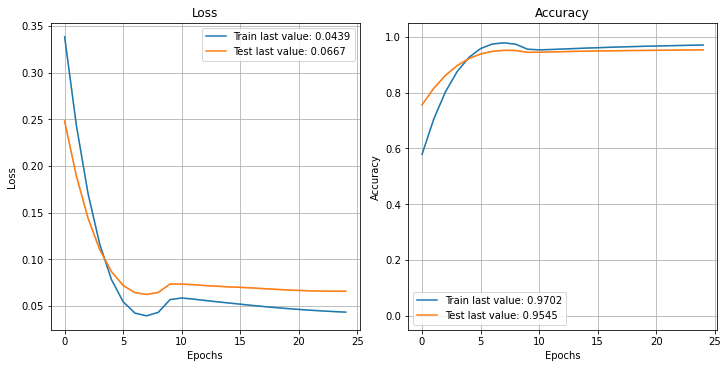

In [13]:
show_history(mlp1_history.history,interpolate=True)

The MLP evaluation results were sorted into a pandas dataframe and visualized on a graph. The training time was 36.4 seconds for the network and final test accuracy was 0.9545. 

In [14]:
mlp2 = tf.keras.Sequential()
mlp2.add(tf.keras.Input(shape=(784,)))
mlp2.add(layers.Dense(32,activation='relu'))
mlp2.add(layers.Dense(32,activation='relu'))
mlp2.add(layers.Dense(10,activation='relu'))
mlp2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                25120     
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


This MLP consists of 2 hidden layers with relu activation.

In [15]:
mlp2.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [16]:
%%time
mlp2_history=mlp2.fit(TrainX, Trainy,
        epochs=25,
        batch_size=32,
        validation_data=(TestX,Testy),
        verbose=0)

CPU times: user 51.5 s, sys: 7.19 s, total: 58.7 s
Wall time: 35 s


In [17]:
pd.DataFrame(mlp2_history.history).sort_values(['val_acc'],ascending=False)

,loss,acc,val_loss,val_acc
24,0.200292,0.868942,0.219238,0.859048
20,0.203254,0.866852,0.220860,0.858571
21,0.202368,0.867328,0.223853,0.858095
22,0.201679,0.867725,0.222302,0.857857
18,0.206106,0.865026,0.221095,0.857857
23,0.201608,0.868413,0.222139,0.857143
16,0.207803,0.862963,0.221862,0.856667
17,0.206286,0.863439,0.223918,0.856429
14,0.210370,0.860503,0.223343,0.855238
19,0.204887,0.865476,0.223359,0.854762


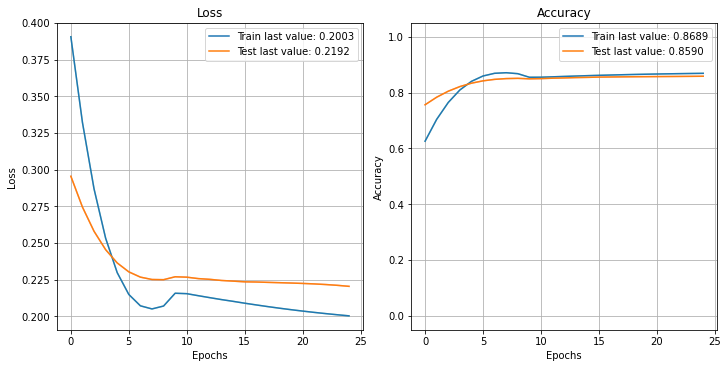

In [18]:
show_history(mlp2_history.history,interpolate=True)

The training time of this network was 35 seconds and the final test accuracy was 0.8590.

In [19]:
mlp3 = tf.keras.Sequential()
mlp3.add(tf.keras.Input(shape=(784,)))
mlp3.add(layers.Dense(32,activation='sigmoid'))
mlp3.add(layers.Dense(32,activation='sigmoid'))
mlp3.add(layers.Dense(32,activation='sigmoid'))
mlp3.add(layers.Dense(32,activation='sigmoid'))
mlp3.add(layers.Dense(10,activation='sigmoid'))
mlp3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


This MLP consists of 4 hidden layers with sigmoid activation.

In [20]:
mlp3.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [21]:
%%time
mlp3_history=mlp3.fit(TrainX, Trainy,
        epochs=25,
        batch_size=32,
        validation_data=(TestX,Testy),
        verbose=0)

CPU times: user 59.9 s, sys: 8.02 s, total: 1min 7s
Wall time: 40.5 s


In [22]:
pd.DataFrame(mlp3_history.history).sort_values(['val_acc'],ascending=False)

,loss,acc,val_loss,val_acc
24,0.091826,0.878783,0.091829,0.885238
23,0.096665,0.871852,0.096370,0.878095
22,0.101775,0.862989,0.101206,0.872381
21,0.107087,0.848042,0.106196,0.858810
20,0.112567,0.828651,0.111346,0.837619
19,0.118128,0.804735,0.116707,0.813571
18,0.123846,0.785344,0.122105,0.786429
17,0.129928,0.762011,0.127824,0.768095
16,0.136642,0.737381,0.134094,0.750238
15,0.144139,0.710159,0.141027,0.725000


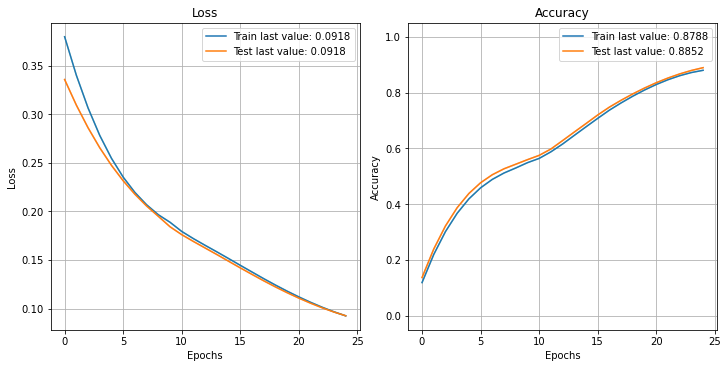

In [23]:
show_history(mlp3_history.history,interpolate=True)

The training time of this network was 40.5 seconds and the final test accuracy was 0.8852.

In [24]:
mlp4 = tf.keras.Sequential()
mlp4.add(tf.keras.Input(shape=(784,)))
mlp4.add(layers.Dense(32,activation='sigmoid'))
mlp4.add(layers.Dense(32,activation='sigmoid'))
mlp4.add(layers.Dense(10,activation='sigmoid'))
mlp4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                25120     
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


This MLP consists of 2 hidden layers with sigmoid activation.

In [25]:
mlp4.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [26]:
%%time
mlp4_history=mlp4.fit(TrainX, Trainy,
        epochs=25,
        batch_size=32,
        validation_data=(TestX,Testy),
        verbose=0)

CPU times: user 51.5 s, sys: 7.1 s, total: 58.6 s
Wall time: 41.6 s


In [27]:
pd.DataFrame(mlp4_history.history).sort_values(['val_acc'],ascending=False)

,loss,acc,val_loss,val_acc
24,0.050166,0.922460,0.052066,0.917857
23,0.051301,0.921032,0.053186,0.915476
22,0.052543,0.919418,0.054285,0.915238
21,0.053895,0.918042,0.055435,0.913810
20,0.055378,0.916296,0.056697,0.912619
19,0.057018,0.914815,0.058177,0.911190
18,0.058842,0.912937,0.059844,0.909286
17,0.060899,0.910952,0.061726,0.906905
16,0.063264,0.909392,0.063822,0.905476
15,0.065978,0.906825,0.066267,0.904524


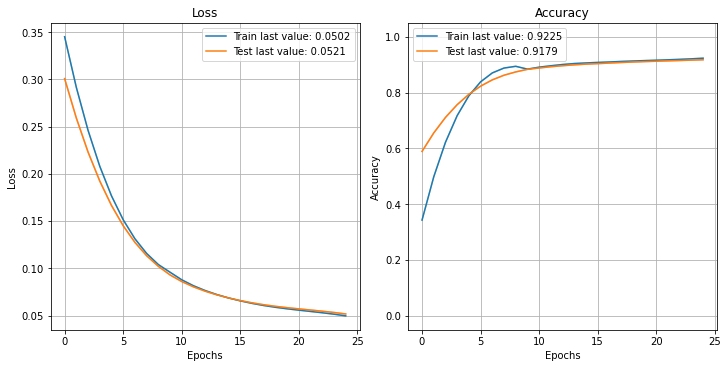

In [28]:
show_history(mlp4_history.history,interpolate=True)

The training time of this network was 41.6 seconds and the final test accuracy was 0.9179.

# 1B

In [29]:
TrainXRS = TrainX.reshape(-1,28,28,1)
TestXRS = TestX.reshape(-1,28,28,1)
TestXRS.shape

(4200, 28, 28, 1)

The training and validation data are reshaped here to fit into the CNN model.

In [30]:
tf.keras.utils.set_random_seed(9)
tf.keras.backend.clear_session()

In [31]:
inputs = tf.keras.Input(shape=(28,28,1))
x=layers.Conv2D(filters=32,
                kernel_size=3,
                activation='relu')(inputs)
x=layers.MaxPooling2D()(x)
x=layers.Conv2D(filters=32,
                kernel_size=3,
                activation='relu')(x)
x=layers.MaxPooling2D()(x)
x=layers.Flatten()(x)
outputs=layers.Dense(10,activation='relu')(x)
convModel1=models.Model(inputs=inputs,outputs=outputs)
convModel1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0     

The first CNN model consists of 5 hidden layers (2 Conv2D, 2 MaxPooling 2D, and 1 Flatten), relu activation, 32 filters and 3 kernel size. Three more CNN models will be created that consists of 5 hidden layers with sigmoid activation, 3 hidden layers with relu activation, and 3 hidden layers with sigmoid activation.

In [32]:
convModel1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc'])

In [33]:
%%time
convModel1_history=convModel1.fit(TrainXRS,Trainy,
                                 batch_size=32,
                                 epochs=25,
                                validation_data=(TestXRS,Testy),
        verbose=0)

CPU times: user 10min 24s, sys: 3min 21s, total: 13min 46s
Wall time: 5min 23s


In [34]:
pd.DataFrame(convModel1_history.history).sort_values(['val_acc'],
                                                     ascending=False)

,loss,acc,val_loss,val_acc
24,0.629242,0.689418,0.635679,0.688095
23,0.629685,0.689153,0.634870,0.688095
21,0.629655,0.688730,0.635296,0.687857
20,0.629939,0.688810,0.635347,0.687381
22,0.629570,0.689656,0.634740,0.687143
18,0.629959,0.688492,0.634923,0.687143
19,0.629895,0.688677,0.635734,0.686905
13,0.632149,0.686561,0.635794,0.686190
17,0.630256,0.688280,0.635057,0.686190
16,0.631208,0.687963,0.635717,0.686190


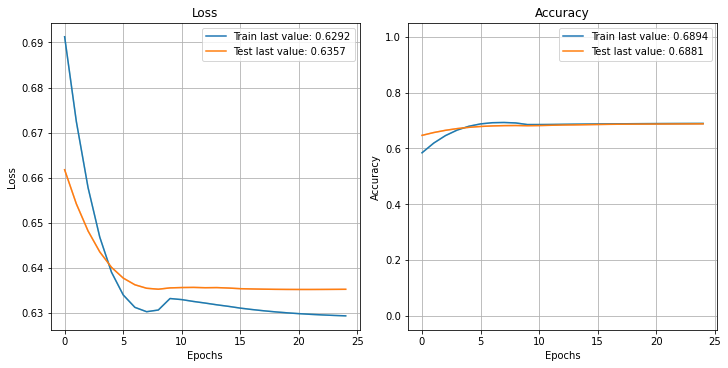

In [35]:
show_history(convModel1_history.history,interpolate=True)

The training time of this network was 5 minutes and 23 seconds and the final test accuracy was 0.6881.

In [36]:
inputs = tf.keras.Input(shape=(28,28,1))
x=layers.Conv2D(filters=32,
                kernel_size=3,
                activation='sigmoid')(inputs)
x=layers.MaxPooling2D()(x)
x=layers.Conv2D(filters=32,
                kernel_size=3,
                activation='sigmoid')(x)
x=layers.MaxPooling2D()(x)
x=layers.Flatten()(x)
outputs=layers.Dense(10,activation='sigmoid')(x)
convModel2=models.Model(inputs=inputs,outputs=outputs)
convModel2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0   

This CNN consists of 5 hidden layers(2 Conv2D, 2 MaxPooling2D, and 1 Flatten) with sigmoid activation.

In [37]:
convModel2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc'])

In [38]:
%%time
convModel2_history=convModel2.fit(TrainXRS,Trainy,
                                 batch_size=32,
                                 epochs=25,
                                validation_data=(TestXRS,Testy),
        verbose=0)

CPU times: user 11min 14s, sys: 3min 23s, total: 14min 38s
Wall time: 5min 36s


In [39]:
pd.DataFrame(convModel2_history.history).sort_values(['val_acc'],
                                                     ascending=False)

,loss,acc,val_loss,val_acc
24,0.028935,0.963677,0.030745,0.959524
23,0.029776,0.962460,0.031525,0.957619
22,0.030628,0.961878,0.032375,0.957381
21,0.031611,0.959815,0.033323,0.955952
20,0.032675,0.958624,0.034375,0.955714
19,0.033864,0.956931,0.035434,0.953809
18,0.035179,0.955635,0.036616,0.951429
17,0.036624,0.953968,0.038177,0.949048
16,0.038283,0.951587,0.039647,0.947857
15,0.040099,0.948862,0.041643,0.944286


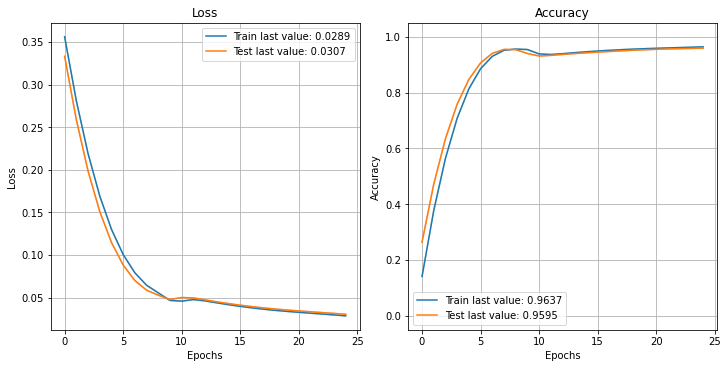

In [40]:
show_history(convModel2_history.history,interpolate=True)

The training time of this network was 5 minutes and 36 seconds and the final test accuracy was 0.9595.

In [41]:
inputs = tf.keras.Input(shape=(28,28,1))
x=layers.Conv2D(filters=32,
                kernel_size=3,
                activation='relu')(inputs)
x=layers.MaxPooling2D()(x)
x=layers.Flatten()(x)
outputs=layers.Dense(10,activation='relu')(x)
convModel3=models.Model(inputs=inputs,outputs=outputs)
convModel3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_______________________________________________________

This CNN consists of 3 hidden layers(1 Conv2D, 1 MaxPooling2D, and 1 Flatten) with relu activation.

In [42]:
convModel3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc'])

In [43]:
%%time
convModel3_history=convModel3.fit(TrainXRS,Trainy,
                                 batch_size=32,
                                 epochs=25,
                                validation_data=(TestXRS,Testy),
        verbose=0)

CPU times: user 6min 1s, sys: 38.7 s, total: 6min 40s
Wall time: 2min 48s


In [44]:
pd.DataFrame(convModel3_history.history).sort_values(['val_acc'],
                                                     ascending=False)

,loss,acc,val_loss,val_acc
20,1.087092,0.394021,1.088004,0.392857
24,1.086653,0.394153,1.088771,0.392619
21,1.086940,0.393995,1.089233,0.392619
18,1.087541,0.393492,1.088405,0.392619
23,1.086798,0.394180,1.088451,0.392143
19,1.087318,0.393571,1.088713,0.392143
22,1.086719,0.394101,1.088160,0.391905
11,1.089133,0.391772,1.089865,0.391190
17,1.087419,0.393386,1.088791,0.391190
15,1.088117,0.393095,1.089146,0.391190


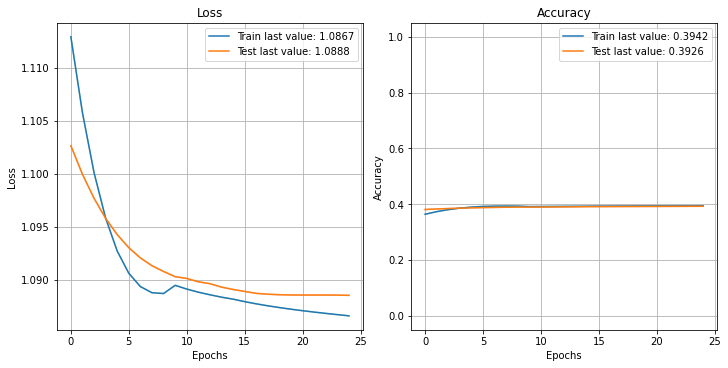

In [45]:
show_history(convModel3_history.history,interpolate=True)

The training time of this network was 2 minutes and 48 seconds and the final test accuracy was 0.3929.

In [46]:
inputs = tf.keras.Input(shape=(28,28,1))
x=layers.Conv2D(filters=32,
                kernel_size=3,
                activation='sigmoid')(inputs)
x=layers.MaxPooling2D()(x)
x=layers.Flatten()(x)
outputs=layers.Dense(10,activation='sigmoid')(x)
convModel4=models.Model(inputs=inputs,outputs=outputs)
convModel4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_______________________________________________________

This CNN consists of 3 hidden layers(1 Conv2D, 1 MaxPooling2D, and 1 Flatten) with sigmoid activation.

In [47]:
convModel4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc'])

In [48]:
%%time
convModel4_history=convModel4.fit(TrainXRS,Trainy,
                                 batch_size=32,
                                 epochs=25,
                                validation_data=(TestXRS,Testy),
        verbose=0)

CPU times: user 6min 42s, sys: 42.2 s, total: 7min 24s
Wall time: 3min 6s


In [49]:
pd.DataFrame(convModel4_history.history).sort_values(['val_acc'],
                                                     ascending=False)

,loss,acc,val_loss,val_acc
24,0.054150,0.928016,0.058022,0.920952
22,0.055531,0.925608,0.059235,0.920476
23,0.054825,0.926323,0.058926,0.917143
21,0.056371,0.923624,0.059453,0.916905
19,0.058135,0.922222,0.063020,0.915238
20,0.057364,0.923175,0.060496,0.914762
18,0.059041,0.919894,0.063989,0.911667
17,0.060014,0.918122,0.063690,0.911667
13,0.063985,0.911667,0.067065,0.909524
14,0.062996,0.913677,0.066549,0.908810


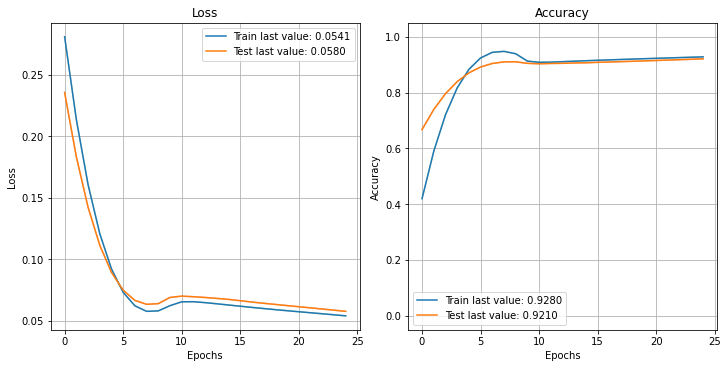

In [50]:
show_history(convModel4_history.history,interpolate=True)

The training time of this network was 3 minutes and 6 seconds and the final test accuracy was 0.9210.

The 2nd CNN that consists of 5 hidden layers(2 Conv2D, 2 MaxPooling2D, and 1 Flatten) with sigmoid activation was determined to have the best final test accuracy out of all the networks. This network will be utilized on the test data for submission.

In [59]:
testDat2 = testDat.to_numpy(copy = True)
testDat2 = testDat2/255
testDatRS = testDat2.reshape(-1,28,28,1)
predy = np.argmax(convModel2.predict(testDatRS), axis=-1)

In [61]:
submission = pd.DataFrame({'ImageId':pd.Series(list(range(1, len(predy)+1))),
                                   'Label':pd.Series(predy)})
submission.to_csv("Submission_Digit.csv", index=False)

The test data was converted to numpy, standardized, and reshaped, and it was put into CNN model 2 to predict the labels. The ImageId's and labels were then put together in a pandas series for submission.

# Assigment 4 Part 2

# 2A

In [102]:
train_disaster = pd.read_csv('train_disaster.csv')
test_disaster =  pd.read_csv('test_disaster.csv')

In [103]:
maxLen = 80 # maximum tweet length
trainDatNbr = 7000 # number of tweets that will be used for training
valDatNbr = 200 # tweets for validation
maxWords = 10000 # max number of words to use

The parameters for the RNN model were set here. The max tweet length was set to 80 tokens, the number of tweets used in the training set was set to 7000, the number of tweets for the validation set was 200, and the max number of words to use was 10000. 

In [104]:
tokenizer = Tokenizer(num_words=maxWords) # split into words, no more than 10k
# The tokenizer will by default remove punctuation

tokenizer.fit_on_texts(train_disaster["text"]) 
sequences = tokenizer.texts_to_sequences(train_disaster["text"])
paddedSeqs = pad_sequences(sequences,maxLen) # A np array
targets = np.asarray(train_disaster["target"]) # Another np array

The tokenizer was created her and fit, sequenced, and padded using the text column in the train dataset. This created a numpy array and another numpy array was created for our target variable.

In [105]:
wordIndx=tokenizer.word_index
type(wordIndx)

dict

In [106]:
np.random.seed(55)
Indx = np.arange(len(paddedSeqs))
np.random.shuffle(Indx)
targets=targets[Indx]
paddedSeqs=paddedSeqs[Indx]

In [107]:
XTrain = paddedSeqs[:trainDatNbr] # training data
yTrain = targets[:trainDatNbr] # training targets
XVal = paddedSeqs[trainDatNbr:trainDatNbr+valDatNbr]
yVal = targets[trainDatNbr:trainDatNbr+valDatNbr]

The training data was randomly shuffled to create the x and y training data and the x and y validation data.

In [108]:
XTrain.shape
yTrain.shape
XVal.shape
yVal.shape

(7000, 80)

(7000,)

(200, 80)

(200,)

In [109]:
emDim = 100
model = tf.keras.Sequential()
model.add(layers.Embedding(maxWords,emDim,input_length=maxLen))
model.add(layers.Flatten())
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 80, 100)           1000000   
                                                                 
 flatten_7 (Flatten)         (None, 8000)              0         
                                                                 
 dense_8 (Dense)             (None, 50)                400050    
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,400,101
Trainable params: 1,400,101
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.layers[0].trainable=True

In [111]:
model.compile(
optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'],
)

In [125]:
history=model.fit(XTrain, yTrain,
epochs=25,
batch_size=32,
validation_data=(XVal,yVal),
verbose=0)

The RNN model was created with 3 hidden layers (1 Flatten, 2 Dense) using the relu and sigmoid activation. The model was set to learn weights for the word embeddings while training. 

In [126]:
pd.DataFrame(history.history).sort_values(['val_acc'],ascending=False)

,loss,acc,val_loss,val_acc
6,0.045296,0.985000,1.901084,0.710
10,0.045137,0.985571,1.991768,0.710
17,0.052152,0.983714,2.211473,0.705
22,0.051586,0.983857,2.257645,0.690
19,0.050616,0.983429,2.405367,0.685
12,0.049794,0.984143,2.302638,0.680
2,0.041582,0.985429,1.911360,0.680
4,0.044672,0.985000,1.909885,0.675
16,0.051749,0.984286,2.068586,0.675
21,0.053337,0.983286,2.363733,0.670


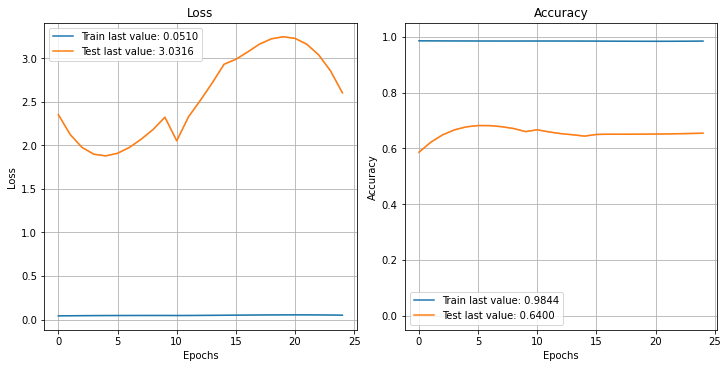

In [127]:
show_history(history.history,interpolate=True)

The highest validation accuracy for this network was 0.710. Based on the plots, the model appears to have been overfitted as the training data has very high accuracy compared to the validation data.

# 2B

In [131]:
GloVeFil='/Users/jyoon/Desktop/glove.twitter.27B.100d.txt' # vector file
emIndx=dict()
with open(GloVeFil) as inFile:
    emFil=inFile.readlines()
cnt = 0
for line in emFil: # reading line by line
    vals = line.split()
    word = vals[0] # word is first value in each line
    coefs = np.asarray(vals[1:],dtype='float32') # rest of line read into 
    #nparray
    emIndx[word]=coefs

In [132]:
print(f'number of vectors {len(emIndx)}')

number of vectors 1193515


In [134]:
maxWords=10000
emDim=100
emMat=np.zeros((maxWords,emDim)) # start with all zeros
for word, i in wordIndx.items():
    if i < maxWords:
        emVec = emIndx.get(word) # default is None when word is not in the 
        #index
        if emVec is not None:
            emMat[i]=emVec

The matrix was created here for the pre-trained word embeddings. 

In [135]:
type(emMat)
emMat.shape

numpy.ndarray

(10000, 100)

In [137]:
model2 = tf.keras.Sequential()
model2.add(layers.Embedding(maxWords,emDim,input_length=maxLen))
model2.add(layers.Flatten())
model2.add(layers.Dense(50,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 80, 100)           1000000   
                                                                 
 flatten_9 (Flatten)         (None, 8000)              0         
                                                                 
 dense_12 (Dense)            (None, 50)                400050    
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,400,101
Trainable params: 1,400,101
Non-trainable params: 0
_________________________________________________________________


In [138]:
model2.layers[0].set_weights([emMat])
model2.layers[0].trainable=False

In [139]:
model2.compile(
optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'],
)

In [140]:
history2=model2.fit(XTrain, yTrain,
epochs=25,
batch_size=32,
validation_data=(XVal,yVal),
verbose=0)

This RNN model was created similarly to the last RNN model except that this model used the pre trained word embeddings in the created matrix to predict disaster occurances.

In [141]:
pd.DataFrame(history2.history).sort_values(['val_acc'],ascending=False)

,loss,acc,val_loss,val_acc
2,0.311069,0.871714,0.456722,0.815
1,0.382689,0.831857,0.467351,0.810
0,0.494415,0.770571,0.457979,0.800
10,0.078712,0.977143,0.810569,0.800
20,0.064747,0.980286,0.957772,0.795
7,0.102316,0.970429,0.686909,0.790
15,0.066352,0.979714,0.911714,0.785
23,0.060486,0.981000,1.018119,0.780
6,0.120962,0.965286,0.635013,0.780
8,0.096759,0.973286,0.719370,0.780


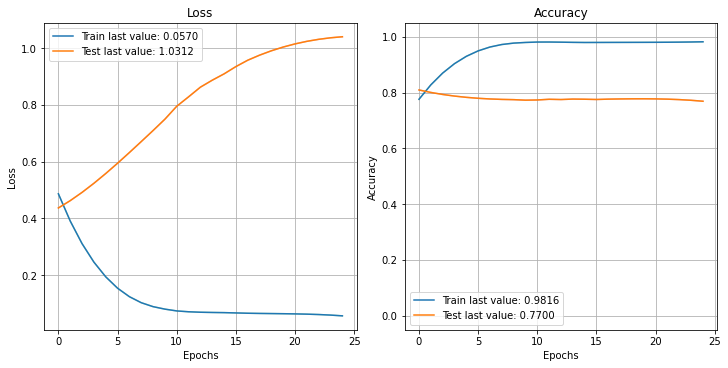

In [143]:
show_history(history2.history,interpolate=True)

The highest validation accuracy for this network was 0.815. This model appears to be more accurate and more fit compared to the other RNN model so it will be used for submission.

In [185]:
tokenizer = Tokenizer(num_words=maxWords) 
tokenizer.fit_on_texts(test_disaster["text"]) 
sequences2 = tokenizer.texts_to_sequences(test_disaster["text"])
paddedSeqs2 = pad_sequences(sequences2,maxLen)
predy2 =model2.predict(paddedSeqs2)
predy2=np.round(predy2).astype(int).reshape(len(predy2))

In [186]:
submission = pd.DataFrame({'id':pd.Series((test_disaster['id'])),
                                   'target':pd.Series(predy2)})
submission.to_csv("Submission_Disaster.csv", index=False)

The test data was input into the network and prepared for submission.